<a href="https://colab.research.google.com/github/kaika02/naive-bayes/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Imoort Dataset**

In [3]:
customer = pd.read_csv('data_customer.csv')

In [4]:
customer.head(15)

,Age,Gender,Payment Method,Future Customer
0,44,male,1,1
1,86,female,1,0
2,17,female,1,1
3,57,female,1,0
4,48,female,1,0
5,39,female,1,0
6,78,male,1,0
7,38,male,1,1
8,80,male,2,0
9,33,male,1,1


*   Payment Method


> 1 = credit card

> 2 = cheque

> 3 = cash


*   Future Customer


> 0 = No

> 1 = Yes

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              500 non-null    int64 
 1   Gender           500 non-null    object
 2   Payment Method   500 non-null    int64 
 3   Future Customer  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
x = customer.iloc[:,[0,2]].values
y = customer.iloc[:, -1].values

In [7]:
x

array([[44,  1],
       [86,  1],
       [17,  1],
       [57,  1],
       [48,  1],
       [39,  1],
       [78,  1],
       [38,  1],
       [80,  2],
       [33,  1],
       [54,  1],
       [53,  3],
       [63,  3],
       [91,  3],
       [17,  1],
       [22,  1],
       [17,  1],
       [57,  1],
       [25,  1],
       [50,  1],
       [46,  3],
       [28,  1],
       [40,  1],
       [63,  3],
       [48,  2],
       [20,  1],
       [56,  1],
       [23,  1],
       [57,  1],
       [24,  1],
       [55,  1],
       [42,  1],
       [22,  3],
       [58,  1],
       [90,  1],
       [45,  3],
       [35,  1],
       [58,  1],
       [49,  1],
       [27,  2],
       [20,  1],
       [51,  3],
       [19,  1],
       [39,  1],
       [47,  3],
       [30,  2],
       [47,  1],
       [21,  1],
       [73,  2],
       [25,  2],
       [33,  1],
       [39,  3],
       [42,  3],
       [34,  1],
       [62,  1],
       [37,  3],
       [24,  3],
       [25,  3],
       [39,  2

In [8]:
y

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

**Splitting the dataset into the Training set and Test set**

Data yang digunakan untuk Test yaitu sebesar 25% atau sekitar 125 data.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
x_train

array([[62,  1],
       [57,  1],
       [50,  1],
       [26,  1],
       [34,  3],
       [85,  1],
       [21,  1],
       [35,  1],
       [37,  3],
       [47,  3],
       [40,  1],
       [77,  1],
       [21,  1],
       [35,  3],
       [46,  3],
       [48,  3],
       [42,  3],
       [64,  3],
       [56,  1],
       [45,  3],
       [48,  1],
       [56,  3],
       [31,  1],
       [53,  2],
       [39,  1],
       [80,  2],
       [61,  1],
       [23,  1],
       [46,  2],
       [43,  1],
       [40,  1],
       [39,  1],
       [46,  3],
       [46,  1],
       [17,  1],
       [29,  1],
       [37,  1],
       [47,  3],
       [45,  3],
       [84,  1],
       [50,  1],
       [43,  3],
       [26,  1],
       [64,  1],
       [32,  1],
       [36,  3],
       [23,  3],
       [33,  1],
       [56,  1],
       [72,  1],
       [21,  2],
       [52,  1],
       [39,  3],
       [25,  1],
       [39,  1],
       [80,  3],
       [31,  1],
       [33,  2],
       [27,  3

In [11]:
x_test

array([[76,  3],
       [22,  1],
       [50,  3],
       [37,  1],
       [56,  2],
       [22,  1],
       [53,  1],
       [17,  3],
       [44,  1],
       [68,  1],
       [20,  1],
       [75,  2],
       [75,  1],
       [60,  1],
       [72,  3],
       [49,  1],
       [32,  1],
       [40,  1],
       [51,  1],
       [58,  1],
       [82,  1],
       [27,  1],
       [52,  1],
       [39,  1],
       [30,  2],
       [50,  3],
       [28,  1],
       [54,  1],
       [19,  3],
       [30,  3],
       [39,  1],
       [61,  3],
       [52,  2],
       [22,  1],
       [90,  1],
       [37,  1],
       [22,  3],
       [22,  1],
       [24,  2],
       [38,  1],
       [22,  1],
       [47,  1],
       [61,  1],
       [48,  1],
       [79,  1],
       [86,  1],
       [69,  1],
       [69,  3],
       [30,  3],
       [91,  1],
       [41,  2],
       [64,  3],
       [70,  1],
       [25,  1],
       [31,  2],
       [63,  3],
       [62,  1],
       [45,  1],
       [38,  3

In [12]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [13]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train

array([[ 1.01415877e+00, -7.23218445e-01],
       [ 7.31904400e-01, -7.23218445e-01],
       [ 3.36748281e-01, -7.23218445e-01],
       [-1.01807270e+00, -7.23218445e-01],
       [-5.66465705e-01,  1.52746136e+00],
       [ 2.31252888e+00, -7.23218445e-01],
       [-1.30032707e+00, -7.23218445e-01],
       [-5.10014831e-01, -7.23218445e-01],
       [-3.97113083e-01,  1.52746136e+00],
       [ 1.67395659e-01,  1.52746136e+00],
       [-2.27760460e-01, -7.23218445e-01],
       [ 1.86092188e+00, -7.23218445e-01],
       [-1.30032707e+00, -7.23218445e-01],
       [-5.10014831e-01,  1.52746136e+00],
       [ 1.10944785e-01,  1.52746136e+00],
       [ 2.23846533e-01,  1.52746136e+00],
       [-1.14858712e-01,  1.52746136e+00],
       [ 1.12706052e+00,  1.52746136e+00],
       [ 6.75453526e-01, -7.23218445e-01],
       [ 5.44939105e-02,  1.52746136e+00],
       [ 2.23846533e-01, -7.23218445e-01],
       [ 6.75453526e-01,  1.52746136e+00],
       [-7.35818328e-01, -7.23218445e-01],
       [ 5.

In [16]:
x_test

array([[ 1.80447101e+00,  1.52746136e+00],
       [-1.24387619e+00, -7.23218445e-01],
       [ 3.36748281e-01,  1.52746136e+00],
       [-3.97113083e-01, -7.23218445e-01],
       [ 6.75453526e-01,  4.02121459e-01],
       [-1.24387619e+00, -7.23218445e-01],
       [ 5.06100904e-01, -7.23218445e-01],
       [-1.52613057e+00,  1.52746136e+00],
       [-1.95696364e-03, -7.23218445e-01],
       [ 1.35286402e+00, -7.23218445e-01],
       [-1.35677794e+00, -7.23218445e-01],
       [ 1.74802013e+00,  4.02121459e-01],
       [ 1.74802013e+00, -7.23218445e-01],
       [ 9.01257023e-01, -7.23218445e-01],
       [ 1.57866751e+00,  1.52746136e+00],
       [ 2.80297407e-01, -7.23218445e-01],
       [-6.79367453e-01, -7.23218445e-01],
       [-2.27760460e-01, -7.23218445e-01],
       [ 3.93199155e-01, -7.23218445e-01],
       [ 7.88355274e-01, -7.23218445e-01],
       [ 2.14317625e+00, -7.23218445e-01],
       [-9.61621824e-01, -7.23218445e-01],
       [ 4.49650030e-01, -7.23218445e-01],
       [-2.

In [17]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [18]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**Training the Naive Bayes model on Training test**

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

**Predicting the Test set results**

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [22]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51 23]
 [15 36]]


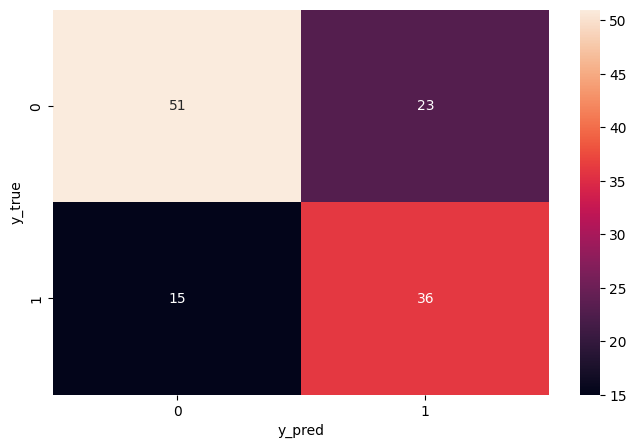

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [25]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        74
           1       0.61      0.71      0.65        51

    accuracy                           0.70       125
   macro avg       0.69      0.70      0.69       125
weighted avg       0.71      0.70      0.70       125



**Visualising the Training set results**

<ipython-input-30-f54e121cd1e6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


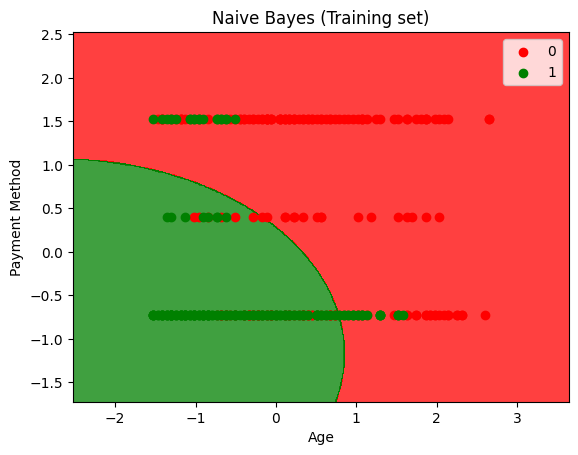

In [30]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Payment Method')
plt.legend()
plt.show()

<ipython-input-31-1eb40f4504d8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


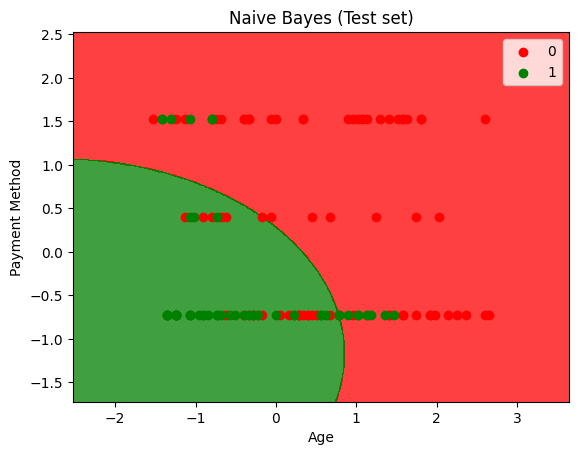

In [31]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Payment Method')
plt.legend()
plt.show()